In [2]:
import qutip as qt
import matplotlib.pyplot as plt
import numpy as np

In [52]:
# constants
omega_0 = 2 * np.pi * 100  # transition frequency
field_freq = omega_0

# create a two-level atom in ket representation first
sigma_x = qt.sigmax()  # Pauli X operator
sigma_y = qt.sigmax()  # Pauli X operator
sigma_z = qt.sigmaz()  # Pauli Z operator

sigma_minus = qt.destroy(2)  # lowering operator
sigma_plus = sigma_minus.dag()  # raising operator

ground_state = qt.ket2dm(
    qt.basis(2, 0)
)  # density matrix for the ground state, (initial state)
excited_state = qt.ket2dm(qt.basis(2, 1))  # density matrix for the excited state

rho_0 = qt.ket2dm((qt.basis(2, 1)).unit())  # initial state of the system
H = omega_0 * sigma_z / 2  # defining the hamiltonian

# spontaneous decay
gamma = 0.01  # decay rate
collapse_op = [np.sqrt(gamma) * sigma_minus]  # collapse operator

In [54]:
# time evolution
t = np.linspace(0, 10, 1000)  # time range
result = qt.mesolve(H, rho_0, t, [collapse_op], [H])

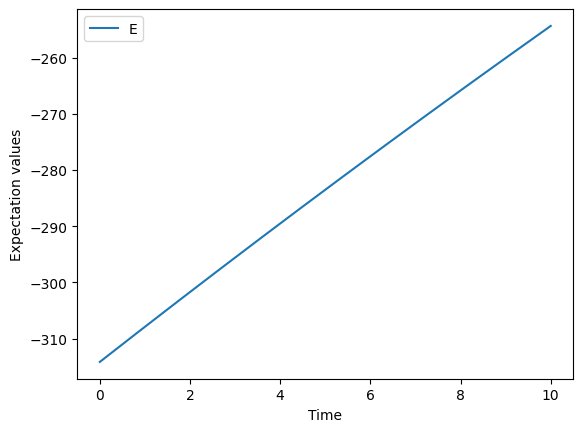

In [55]:
# plotting
plt.plot(t, result.expect[0], label="E")

plt.xlabel("Time")
plt.ylabel("Expectation values")
plt.legend()
plt.show()